# Step 1: Loading the Dataset

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
forest_cover = pd.read_csv('/content/covtype.csv')
forest_cover.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Display the statistics for forest cover datatype
forest_cover.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Step 2: Data Preprocessing

In [4]:
# finding the missing values
forest_cover.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
# Check for duplicates
forest_duplicate = forest_cover[forest_cover.duplicated()]
forest_duplicate

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


# Step 3: Exploratory Data Analysis

In [6]:
forest_corr_matrix = forest_cover.corr().round(2)
forest_corr_matrix

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.00,0.02,-0.24,0.31,0.09,0.37,0.11,0.21,0.06,0.15,...,0.17,0.07,0.01,0.08,0.02,0.04,0.22,0.19,0.21,-0.27
Aspect,0.02,1.00,0.08,0.02,0.07,0.03,-0.58,0.34,0.65,-0.11,...,0.06,0.02,0.01,-0.02,0.00,-0.02,0.02,0.01,-0.01,0.02
Slope,-0.24,0.08,1.00,-0.01,0.27,-0.22,-0.33,-0.53,-0.18,-0.19,...,-0.13,0.21,-0.01,-0.02,0.00,0.01,-0.07,0.09,0.03,0.15
Horizontal_Distance_To_Hydrology,0.31,0.02,-0.01,1.00,0.61,0.07,-0.03,0.05,0.05,0.05,...,0.13,0.10,0.07,-0.01,0.03,-0.01,0.04,0.03,0.15,-0.02
Vertical_Distance_To_Hydrology,0.09,0.07,0.27,0.61,1.00,-0.05,-0.17,-0.11,0.03,-0.07,...,0.04,0.17,0.06,-0.01,0.01,-0.01,-0.01,0.04,0.18,0.08
Horizontal_Distance_To_Roadways,0.37,0.03,-0.22,0.07,-0.05,1.00,0.03,0.19,0.11,0.33,...,-0.09,-0.08,0.01,-0.00,0.01,0.02,0.08,0.03,0.02,-0.15
Hillshade_9am,0.11,-0.58,-0.33,-0.03,-0.17,0.03,1.00,0.01,-0.78,0.13,...,0.01,-0.06,0.01,0.03,0.01,0.01,0.02,-0.03,-0.00,-0.04
Hillshade_Noon,0.21,0.34,-0.53,0.05,-0.11,0.19,0.01,1.00,0.59,0.06,...,0.13,-0.09,0.04,0.01,0.02,-0.02,0.04,-0.07,-0.04,-0.10
Hillshade_3pm,0.06,0.65,-0.18,0.05,0.03,0.11,-0.78,0.59,1.00,-0.05,...,0.08,-0.02,0.02,-0.02,0.00,-0.02,0.02,-0.03,-0.02,-0.05
Horizontal_Distance_To_Fire_Points,0.15,-0.11,-0.19,0.05,-0.07,0.33,0.13,0.06,-0.05,1.00,...,-0.09,-0.06,-0.04,-0.00,-0.01,0.00,-0.02,-0.00,0.01,-0.11


<AxesSubplot:>

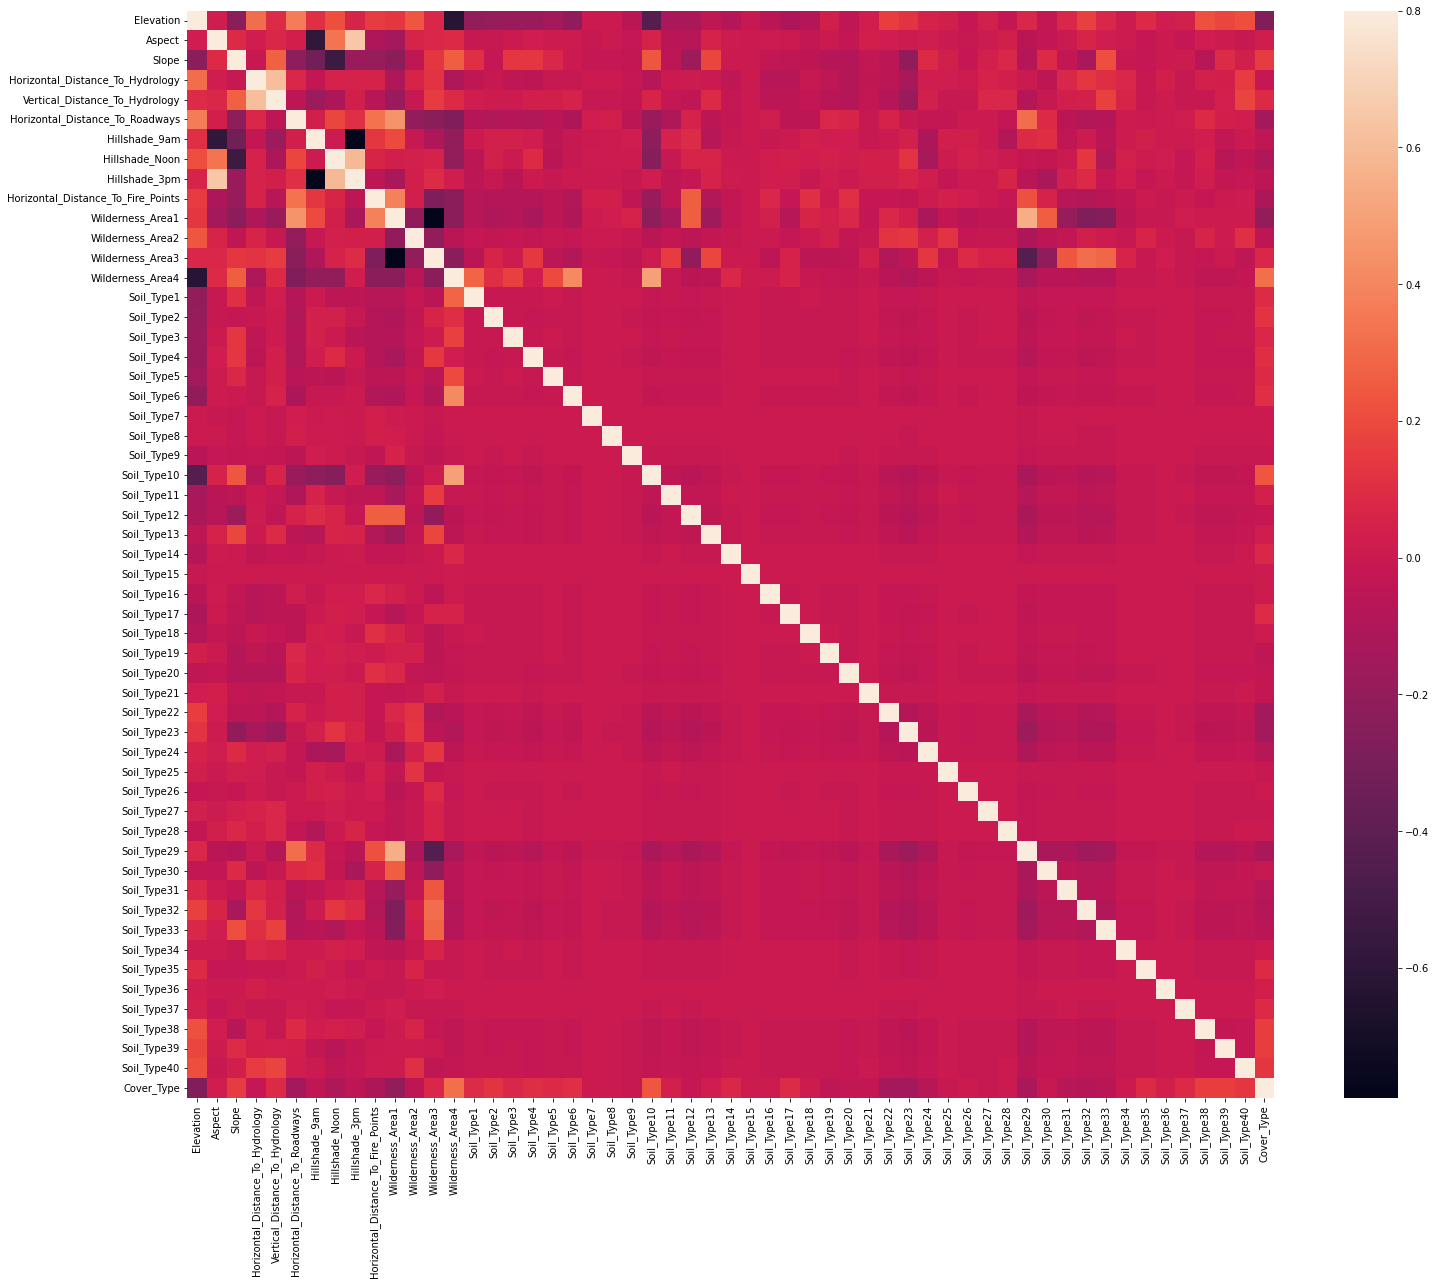

In [7]:
#plotting the correlation matrix
f,ax = plt.subplots(figsize=(25,20))
sns.heatmap(forest_corr_matrix,vmax=0.8,square = True)

In [8]:
forest_corr_matrix = forest_corr_matrix.unstack().sort_values().drop_duplicates()
forest_corr_matrix

Wilderness_Area1                  Wilderness_Area3                 -0.79
Hillshade_9am                     Hillshade_3pm                    -0.78
Wilderness_Area4                  Elevation                        -0.62
Aspect                            Hillshade_9am                    -0.58
Slope                             Hillshade_Noon                   -0.53
                                                                    ... 
Wilderness_Area1                  Soil_Type29                       0.55
Hillshade_3pm                     Hillshade_Noon                    0.59
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.61
Hillshade_3pm                     Aspect                            0.65
Elevation                         Elevation                         1.00
Length: 78, dtype: float64

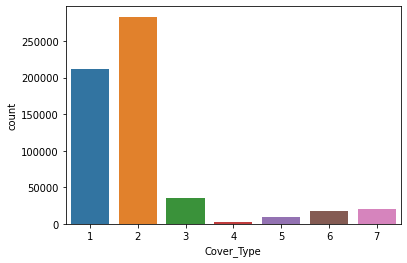

In [9]:
# Plot the distribution of cover types
bar_plot = sns.countplot(data=forest_cover, x='Cover_Type')

In [10]:
# Standardizing the dataset based on important features
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
           'Horizontal_Distance_To_Fire_Points']

scaler_df = StandardScaler()
for column in columns:
    forest_cover[[column]] = scaler_df.fit_transform(forest_cover[[column]])

In [11]:
forest_cover

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0,0,0,0,0,0,0,0,0,3


# Step 4: Split the Dataset into train and test

In [12]:
# Preprocess the data
X = forest_cover.drop('Cover_Type', axis=1)
y = forest_cover['Cover_Type']

In [13]:
# Split the dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (406708, 54)
X_test: (174304, 54)
y_train: (406708,)
y_test: (174304,)


# Step 5: Developing the Models

## First Model - MLP Classifier Model

In [14]:
# create the MLP Classifer Model
mlp_forest = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit into the model
mlp_forest.fit(X_train, y_train)

Iteration 1, loss = 0.65399757
Iteration 2, loss = 0.60346170
Iteration 3, loss = 0.59771053
Iteration 4, loss = 0.59544988
Iteration 5, loss = 0.59371112
Iteration 6, loss = 0.59183901
Iteration 7, loss = 0.59042669
Iteration 8, loss = 0.58939506
Iteration 9, loss = 0.58871540
Iteration 10, loss = 0.58696213
Iteration 11, loss = 0.58592807
Iteration 12, loss = 0.58559260
Iteration 13, loss = 0.58466317
Iteration 14, loss = 0.58409990
Iteration 15, loss = 0.58317332
Iteration 16, loss = 0.58365552
Iteration 17, loss = 0.58328795
Iteration 18, loss = 0.58285661
Iteration 19, loss = 0.58271148
Iteration 20, loss = 0.58282916
Iteration 21, loss = 0.58269432
Iteration 22, loss = 0.58206266
Iteration 23, loss = 0.58216156
Iteration 24, loss = 0.58166012
Iteration 25, loss = 0.58234668
Iteration 26, loss = 0.58136571
Iteration 27, loss = 0.58184145
Iteration 28, loss = 0.58209933
Iteration 29, loss = 0.58101754
Iteration 30, loss = 0.58162664
Iteration 31, loss = 0.58110603
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

## Second Model - Sequential Model

In [25]:
# create the sequential model
model_sequ = Sequential()
model_sequ.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
model_sequ.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
model_sequ.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
model_sequ.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
model_sequ.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# print the model summary 
model_sequ.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 54)                2970      
                                                                 
 dense_5 (Dense)             (None, 50)                2750      
                                                                 
 dense_6 (Dense)             (None, 35)                1785      
                                                                 
 dense_7 (Dense)             (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Print the model history

sequ_model_history = model_sequ.fit(X_train, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
273/273 [==============================] - 3s 8ms/step - loss: 0.8169 - accuracy: 0.6689 - val_loss: 0.6066 - val_accuracy: 0.7461
Epoch 2/100
273/273 [==============================] - 2s 6ms/step - loss: 0.5812 - accuracy: 0.7548 - val_loss: 0.5568 - val_accuracy: 0.7655
Epoch 3/100
273/273 [==============================] - 2s 9ms/step - loss: 0.5400 - accuracy: 0.7710 - val_loss: 0.5227 - val_accuracy: 0.7799
Epoch 4/100
273/273 [==============================] - 2s 6ms/step - loss: 0.5110 - accuracy: 0.7839 - val_loss: 0.4968 - val_accuracy: 0.7905
Epoch 5/100
273/273 [==============================] - 2s 6ms/step - loss: 0.4874 - accuracy: 0.7941 - val_loss: 0.4784 - val_accuracy: 0.7973
Epoch 6/100
273/273 [==============================] - 2s 6ms/step - loss: 0.4695 - accuracy: 0.8025 - val_loss: 0.4608 - val_accuracy: 0.8080
Epoch 7/100
273/273 [==============================] - 2s 6ms/step - loss: 0.4544 - accuracy: 0.8096 - val_loss: 0.4468 - val_accuracy: 0.8140

# Step 6: Evaluating the Models

## Evaluating MLP Model

In [15]:
# Make prediction on test dataset
ypred=mlp_forest.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.7428228841564164

In [16]:
# print classification report for MLP classifer
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           1       0.81      0.70      0.75     73980
           2       0.75      0.80      0.77     80218
           3       0.71      0.75      0.73     10046
           4       0.43      0.67      0.52       526
           5       0.07      0.55      0.12       342
           6       0.43      0.47      0.45      4727
           7       0.64      0.88      0.74      4465

    accuracy                           0.74    174304
   macro avg       0.55      0.69      0.58    174304
weighted avg       0.76      0.74      0.75    174304



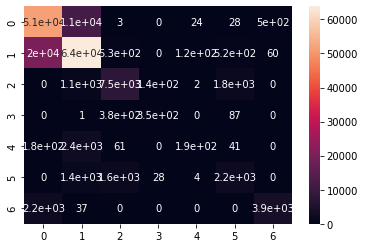

In [23]:
# plot confusion matrix
cm_mlp = confusion_matrix(y_test, ypred)

ax= plt.subplot()
sns.heatmap(cm_mlp, annot=True, ax=ax);

## Evaluating Sequential Model

In [28]:
# List all data in model history
print(sequ_model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


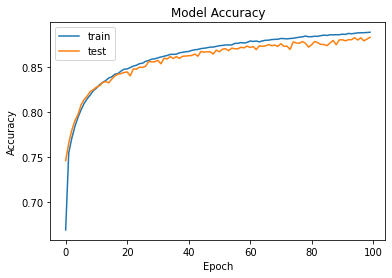

In [29]:
# Summarize history for accuracy
plt.plot(sequ_model_history.history['accuracy'])
plt.plot(sequ_model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

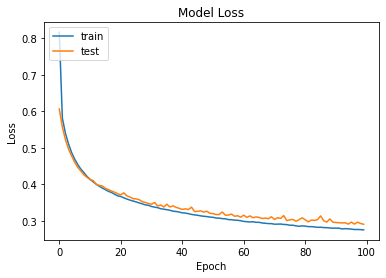

In [30]:
# Summarize history for loss

plt.plot(sequ_model_history.history['loss'])
plt.plot(sequ_model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Calculating the scores of the model

sequ_score = model_sequ.evaluate(X_test, y_test)
sequ_score

5447/5447 [==============================] - 9s 2ms/step - loss: 0.2916 - accuracy: 0.8840


[0.29158392548561096, 0.8840187191963196]

In [32]:
# Predicting on test data

y_pred = model_sequ.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

5447/5447 [==============================] - 7s 1ms/step


array([2, 2, 3, ..., 2, 1, 1])

In [33]:
# Accuracy

accuracy_score(y_pred, y_test)

0.8840187259041674

In [34]:
# Classification Report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88     61550
           2       0.91      0.89      0.90     87072
           3       0.85      0.87      0.86     10400
           4       0.75      0.76      0.75       813
           5       0.71      0.72      0.72      2828
           6       0.75      0.75      0.75      5263
           7       0.91      0.88      0.89      6378

    accuracy                           0.88    174304
   macro avg       0.82      0.82      0.82    174304
weighted avg       0.88      0.88      0.88    174304



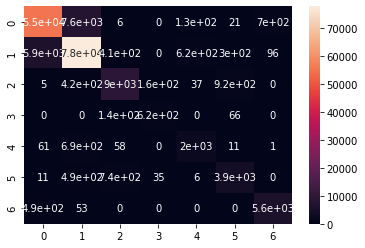

In [35]:
# Confusion Matrix

cm_sequ_model = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm_sequ_model, annot=True, ax=ax);